# ***STEEL MANUFACTURING CLIENTS***

### **Introduction:**

The dataset, STEELMANUF_CLIENTS_SV.Xlsx, is a complete collection of client statistics from a distinguished metal producer based totally in America. This dataset is a wealthy repository of records, encompassing 17,944 rows and 23 variables, every presenting insights into the customer's interaction with the producer's internet-primarily based order gadget.

The database tracks quite a few purchaser actions, from internet web page visits to order confirmations, and categorizes clients into distinct segments—Browsers, Selectors, Quote-best, and Buyers—with the final aim of steering clients in the direction of turning into Buyers. This segmentation is vital as it serves as a gauge for assessing the effectiveness of the automated gadget, assisting the manufacturer recognize which components of the digital ordering method are working nicely and which may additionally require refinement.

*The following table showing the variables, their measurement type, and their potential role (predictor and/or outcome, or excluded):*

In [1]:
import pandas as pd

variables = {
    'Variable Name': ['ID_CLIENT', 'SESSIONS_YEAR', 'AVERAGE_ACTIONS', 'NUMBER_OF_PURCHASES', 'CHANGE_DISTCENTER',
                      'MAXNUMBER_PAGES_VISITED', 'AVGNUMBER_PAGES_VISITED', 'TONS_ONCART', 'TONS_CONFIRMED',
                      'DELIVERY_OR_PICKUP', 'SESSIONS_ONWEBAPP', 'SESSIONS_ATTENDED_BYEXECUTIVE', 'USE_OF_EXCEL_TOOL',
                      'USE_OF_CLIENT_CATALOGUE', 'NUMBER_OF_NEGOTIATIONS', 'USE_OF_PROPOSAL', 'CONSTRUCTION_INDEX',
                      'MANUFACTURING_INDEX', 'MONTHS_AS_CLIENT', 'NUMBER_MONTHS_AS_REGISTEREDCLIENT', 'CLASSIFICATION',
                      'MONTH', 'YEAR'],
    'Measurement Type': ['Nominal', 'Ratio', 'Ratio', 'Ratio', 'Ratio', 'Ratio', 'Ratio', 'Ratio', 'Ratio',
                         'Ratio', 'Ratio', 'Ratio', 'Nominal', 'Nominal', 'Ratio', 'Nominal', 'Scale', 'Scale',
                         'Ratio', 'Ratio', 'Nominal', 'Ordinal', 'Ordinal'],
    'Role of Variable': ['Excluded', 'Predictor', 'Predictor', 'Outcome', 'Predictor', 'Predictor', 'Predictor',
                         'Predictor', 'Outcome', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Predictor',
                         'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Outcome',
                         'Excluded', 'Excluded']
}

# Creating a DataFrame from the variable information
variables_df = pd.DataFrame(variables)
variables_df

,Variable Name,Measurement Type,Role of Variable
0,ID_CLIENT,Nominal,Excluded
1,SESSIONS_YEAR,Ratio,Predictor
2,AVERAGE_ACTIONS,Ratio,Predictor
3,NUMBER_OF_PURCHASES,Ratio,Outcome
4,CHANGE_DISTCENTER,Ratio,Predictor
5,MAXNUMBER_PAGES_VISITED,Ratio,Predictor
6,AVGNUMBER_PAGES_VISITED,Ratio,Predictor
7,TONS_ONCART,Ratio,Predictor
8,TONS_CONFIRMED,Ratio,Outcome
9,DELIVERY_OR_PICKUP,Ratio,Predictor


**RESEARCH QUESTIONS**

1. What elements have an impact on a customer's development from Browser to Buyer?

2. How do outside economic indicators (like the production and production indices) correlate with shopping styles and purchaser classifications?

3. What is the effect of the internet-primarily based device automation at the reduction of reliance on human patron service marketers?

Among the question above, I choose:

**What elements have an impact on a customer's development from Browser to Buyer?**

*Why choose this question:*

This question is highly relevant to the dataset, as it directly relates to understanding the customer journey within the manufacturer's internet-based order system. Analyzing the factors that influence a customer's progression from merely browsing to actually making a purchase can provide actionable insights for enhancing the sales funnel, improving customer experience, and potentially increasing revenue. It is a specific question that allows for a focused analysis of customer behavior and interaction data, making it a strong candidate for a research project.

In [2]:
import pandas as pd

# Loading the dataset
df = pd.read_excel('STEELMANUF_CLIENTS_SV.xlsx')

### **Performing Exploratory Analysis**

In [3]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 ID_CLIENT                            0
SESSIONS_YEAR                        0
AVERAGE_ACTIONS                      0
NUMBER_OF_PURCHASES                  0
CHANGE_DISTCENTER                    0
MAXNUMBER_PAGES_VISITED              0
AVGNUMBER_PAGES_VISITED              0
TONS_ONCART                          0
TONS_CONFIRMED                       0
DELIVERY_OR_PICKUP                   0
SESSIONS_ONWEBAPP                    0
SESSIONS_ATTENDED_BYEXECUTIVE        0
USE_OF_EXCEL_TOOL                    0
USE_OF_CLIENT_CATALOGUE              0
NUMBER_OF_NEGOTIATIONS               0
USE_OF_PROPOSAL                      0
CONSTRUCTION_INDEX                   0
MANUFACTURING_INDEX                  0
MONTHS_AS_CLIENT                     0
NUMBER_MONTHS_AS_REGISTEREDCLIENT    0
CLASSIFICATION                       0
MONTH                                0
YEAR                                 0
dtype: int64


In [4]:
import numpy as np
from scipy import stats

# Z-score method
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum()
print("Outliers:\n", outliers)

Outliers:
 ID_CLIENT                              0
SESSIONS_YEAR                        403
AVERAGE_ACTIONS                      327
NUMBER_OF_PURCHASES                  247
CHANGE_DISTCENTER                    328
MAXNUMBER_PAGES_VISITED              541
AVGNUMBER_PAGES_VISITED              310
TONS_ONCART                          155
TONS_CONFIRMED                       152
DELIVERY_OR_PICKUP                     0
SESSIONS_ONWEBAPP                    399
SESSIONS_ATTENDED_BYEXECUTIVE        315
USE_OF_EXCEL_TOOL                    277
USE_OF_CLIENT_CATALOGUE               66
NUMBER_OF_NEGOTIATIONS               297
USE_OF_PROPOSAL                        0
CONSTRUCTION_INDEX                   166
MANUFACTURING_INDEX                    0
MONTHS_AS_CLIENT                     207
NUMBER_MONTHS_AS_REGISTEREDCLIENT    207
MONTH                                  0
YEAR                                   0
dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler

# 1. Modify variable types
df['USE_OF_EXCEL_TOOL'] = df['USE_OF_EXCEL_TOOL'].astype('category')
df['USE_OF_CLIENT_CATALOGUE'] = df['USE_OF_CLIENT_CATALOGUE'].astype('category')
df['USE_OF_PROPOSAL'] = df['USE_OF_PROPOSAL'].astype('category')
df['CLASSIFICATION'] = df['CLASSIFICATION'].astype('category')

In [6]:
# 2. Create new variables
# Creating a binary variable from 'NUMBER_OF_PURCHASES' (1 if purchases > 0, otherwise 0)
df['MADE_PURCHASE'] = (df['NUMBER_OF_PURCHASES'] > 0).astype(int)

In [7]:
# Selecting numeric variables for scaling. Excluding 'ID_CLIENT', 'MONTH', 'YEAR', and 'MADE_PURCHASE' as they are not suited for scaling.
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['ID_CLIENT', 'MONTH', 'YEAR', 'MADE_PURCHASE'])
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head(), df.dtypes

(   ID_CLIENT  SESSIONS_YEAR  AVERAGE_ACTIONS  NUMBER_OF_PURCHASES  \
 0     896397       0.585216         0.035609             0.474680   
 1     988398       2.095678        -0.177810             1.597908   
 2     957974      -0.264419        -0.781803            -0.423902   
 3     951495      -0.547631         0.125513            -0.423902   
 4     136560      -0.358823        -0.407599            -0.423902   
 
    CHANGE_DISTCENTER  MAXNUMBER_PAGES_VISITED  AVGNUMBER_PAGES_VISITED  \
 0           1.083190                 1.398339                 0.309271   
 1           1.795863                 2.742260                 1.636122   
 2          -0.342158                 0.054419                -0.354155   
 3          -0.342158                 0.591987                 2.299547   
 4          -0.342158                -0.483149                -0.354155   
 
    TONS_ONCART  TONS_CONFIRMED  DELIVERY_OR_PICKUP  ...  \
 0     0.331372        0.355086            1.160588  ...   
 1    

In [8]:
# 3. Exclude variables from model-fitting
df_model = df.drop(['ID_CLIENT', 'MONTH', 'YEAR'], axis=1)


In [9]:
# 4. Centering and Scaling
# It's common to center and scale ratio and scale measurement types for certain analyses
# Selecting numerical columns for scaling
numerical_cols = ['SESSIONS_YEAR', 'AVERAGE_ACTIONS', 'NUMBER_OF_PURCHASES', 'CHANGE_DISTCENTER',
                  'MAXNUMBER_PAGES_VISITED', 'AVGNUMBER_PAGES_VISITED', 'TONS_ONCART', 'TONS_CONFIRMED',
                  'DELIVERY_OR_PICKUP', 'SESSIONS_ONWEBAPP', 'SESSIONS_ATTENDED_BYEXECUTIVE',
                  'NUMBER_OF_NEGOTIATIONS', 'CONSTRUCTION_INDEX', 'MANUFACTURING_INDEX',
                  'MONTHS_AS_CLIENT', 'NUMBER_MONTHS_AS_REGISTEREDCLIENT']

scaler = StandardScaler()
df_model[numerical_cols] = scaler.fit_transform(df_model[numerical_cols])

In [10]:
df

,ID_CLIENT,SESSIONS_YEAR,AVERAGE_ACTIONS,NUMBER_OF_PURCHASES,CHANGE_DISTCENTER,MAXNUMBER_PAGES_VISITED,AVGNUMBER_PAGES_VISITED,TONS_ONCART,TONS_CONFIRMED,DELIVERY_OR_PICKUP,...,NUMBER_OF_NEGOTIATIONS,USE_OF_PROPOSAL,CONSTRUCTION_INDEX,MANUFACTURING_INDEX,MONTHS_AS_CLIENT,NUMBER_MONTHS_AS_REGISTEREDCLIENT,CLASSIFICATION,MONTH,YEAR,MADE_PURCHASE
0,896397,0.585216,0.035609,0.474680,1.083190,1.398339,0.309271,0.331372,0.355086,1.160588,...,-0.366625,0,0.328632,0.816154,1.100469,1.100975,Buyer,8,2017,1
1,988398,2.095678,-0.177810,1.597908,1.795863,2.742260,1.636122,0.490323,0.519180,1.160588,...,2.001525,0,0.072286,0.512768,0.864182,0.864445,Selector,8,2017,1
2,957974,-0.264419,-0.781803,-0.423902,-0.342158,0.054419,-0.354155,-0.107865,-0.098363,-0.944283,...,-0.028318,0,0.657023,-0.116742,-1.309659,-1.311639,Selector,8,2017,0
3,951495,-0.547631,0.125513,-0.423902,-0.342158,0.591987,2.299547,-0.166886,-0.159293,-0.944283,...,-0.028318,0,0.096553,1.073905,-0.624426,-0.625699,Quote-only,8,2017,0
4,136560,-0.358823,-0.407599,-0.423902,-0.342158,-0.483149,-0.354155,-0.243512,-0.238398,-0.944283,...,-0.366625,0,0.549961,2.006364,-0.931600,-0.933189,Browser,8,2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17939,259827,1.057235,0.945686,1.148617,-0.342158,-0.214365,-0.354155,3.753570,2.838332,1.160588,...,-0.366625,1,0.694092,0.555174,0.084435,0.083893,Buyer,6,2020,1
17940,711689,-0.453227,0.709886,-0.423902,-0.342158,0.054419,0.972696,-0.145735,-0.137457,-0.944283,...,0.309989,0,-0.444049,-0.875095,-0.222738,-0.223597,Quote-only,6,2020,0
17941,959604,-0.453227,-0.674156,-0.423902,-0.342158,-0.483149,-0.354155,-0.243512,-0.238398,-0.944283,...,-0.366625,0,-0.115368,0.886086,-0.506283,-0.507434,Browser,6,2020,0
17942,147431,0.774024,0.375666,1.373262,-0.342158,0.591987,0.309271,0.830643,0.870511,1.160588,...,2.678139,1,-1.717164,-1.810866,1.076840,1.077322,Buyer,6,2020,1


***Comments for Output:***

1. CLASSIFICATION has been changed to a categorical type with its dtype of category. This conversion really plays the character of this variable, making a classifier that distinguishes the similar between numeric and continued inputs deal with it correctly for the statistical modelling and analysis.

2. New Binary Outcome Variable: A new column - MADE_PURCHASE - was added to the input dataset. This feature works for tracking if the client click the buy button or not. This modification will facilitate the classification processes, and at the same time, it will offer the convenience to employ the algorithms in forecasting purchase behavior prediction analyses.

3. Standard Scaling of Numeric Variables: The session year, average steps, and so on have been centered, and then scaled into float64 data types with standard values. These three techniques for example, KNN, SVM and logistic regression, they are all dependent on the data scales. This calls for normalization (subtracting the mean and dividing by standard deviation). It implies that variables consider equally weigh in analysis and speeds convergence of the gradient descent method up.

4. Replacing most of the int64 variables with float64 was necessary for scaling. This change will also show a constant alteration of different variables in other areas, in a progressive way. The data preprocessing skipped scaling of the ID_CLIENT, MONTH, YEAR, and MADE_PURCHASE which helped them to maintain their default int64 type.

5. Preservation of Temporal Variables: Consistency is wanted to be maintained in MONTH and YEAR variables, which are temporal and have an ordinal character, so scaling operation shouldn’t operator on them. Change and it ensures for using their presence in the data set to reveal habits like trend or seasonality.



In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

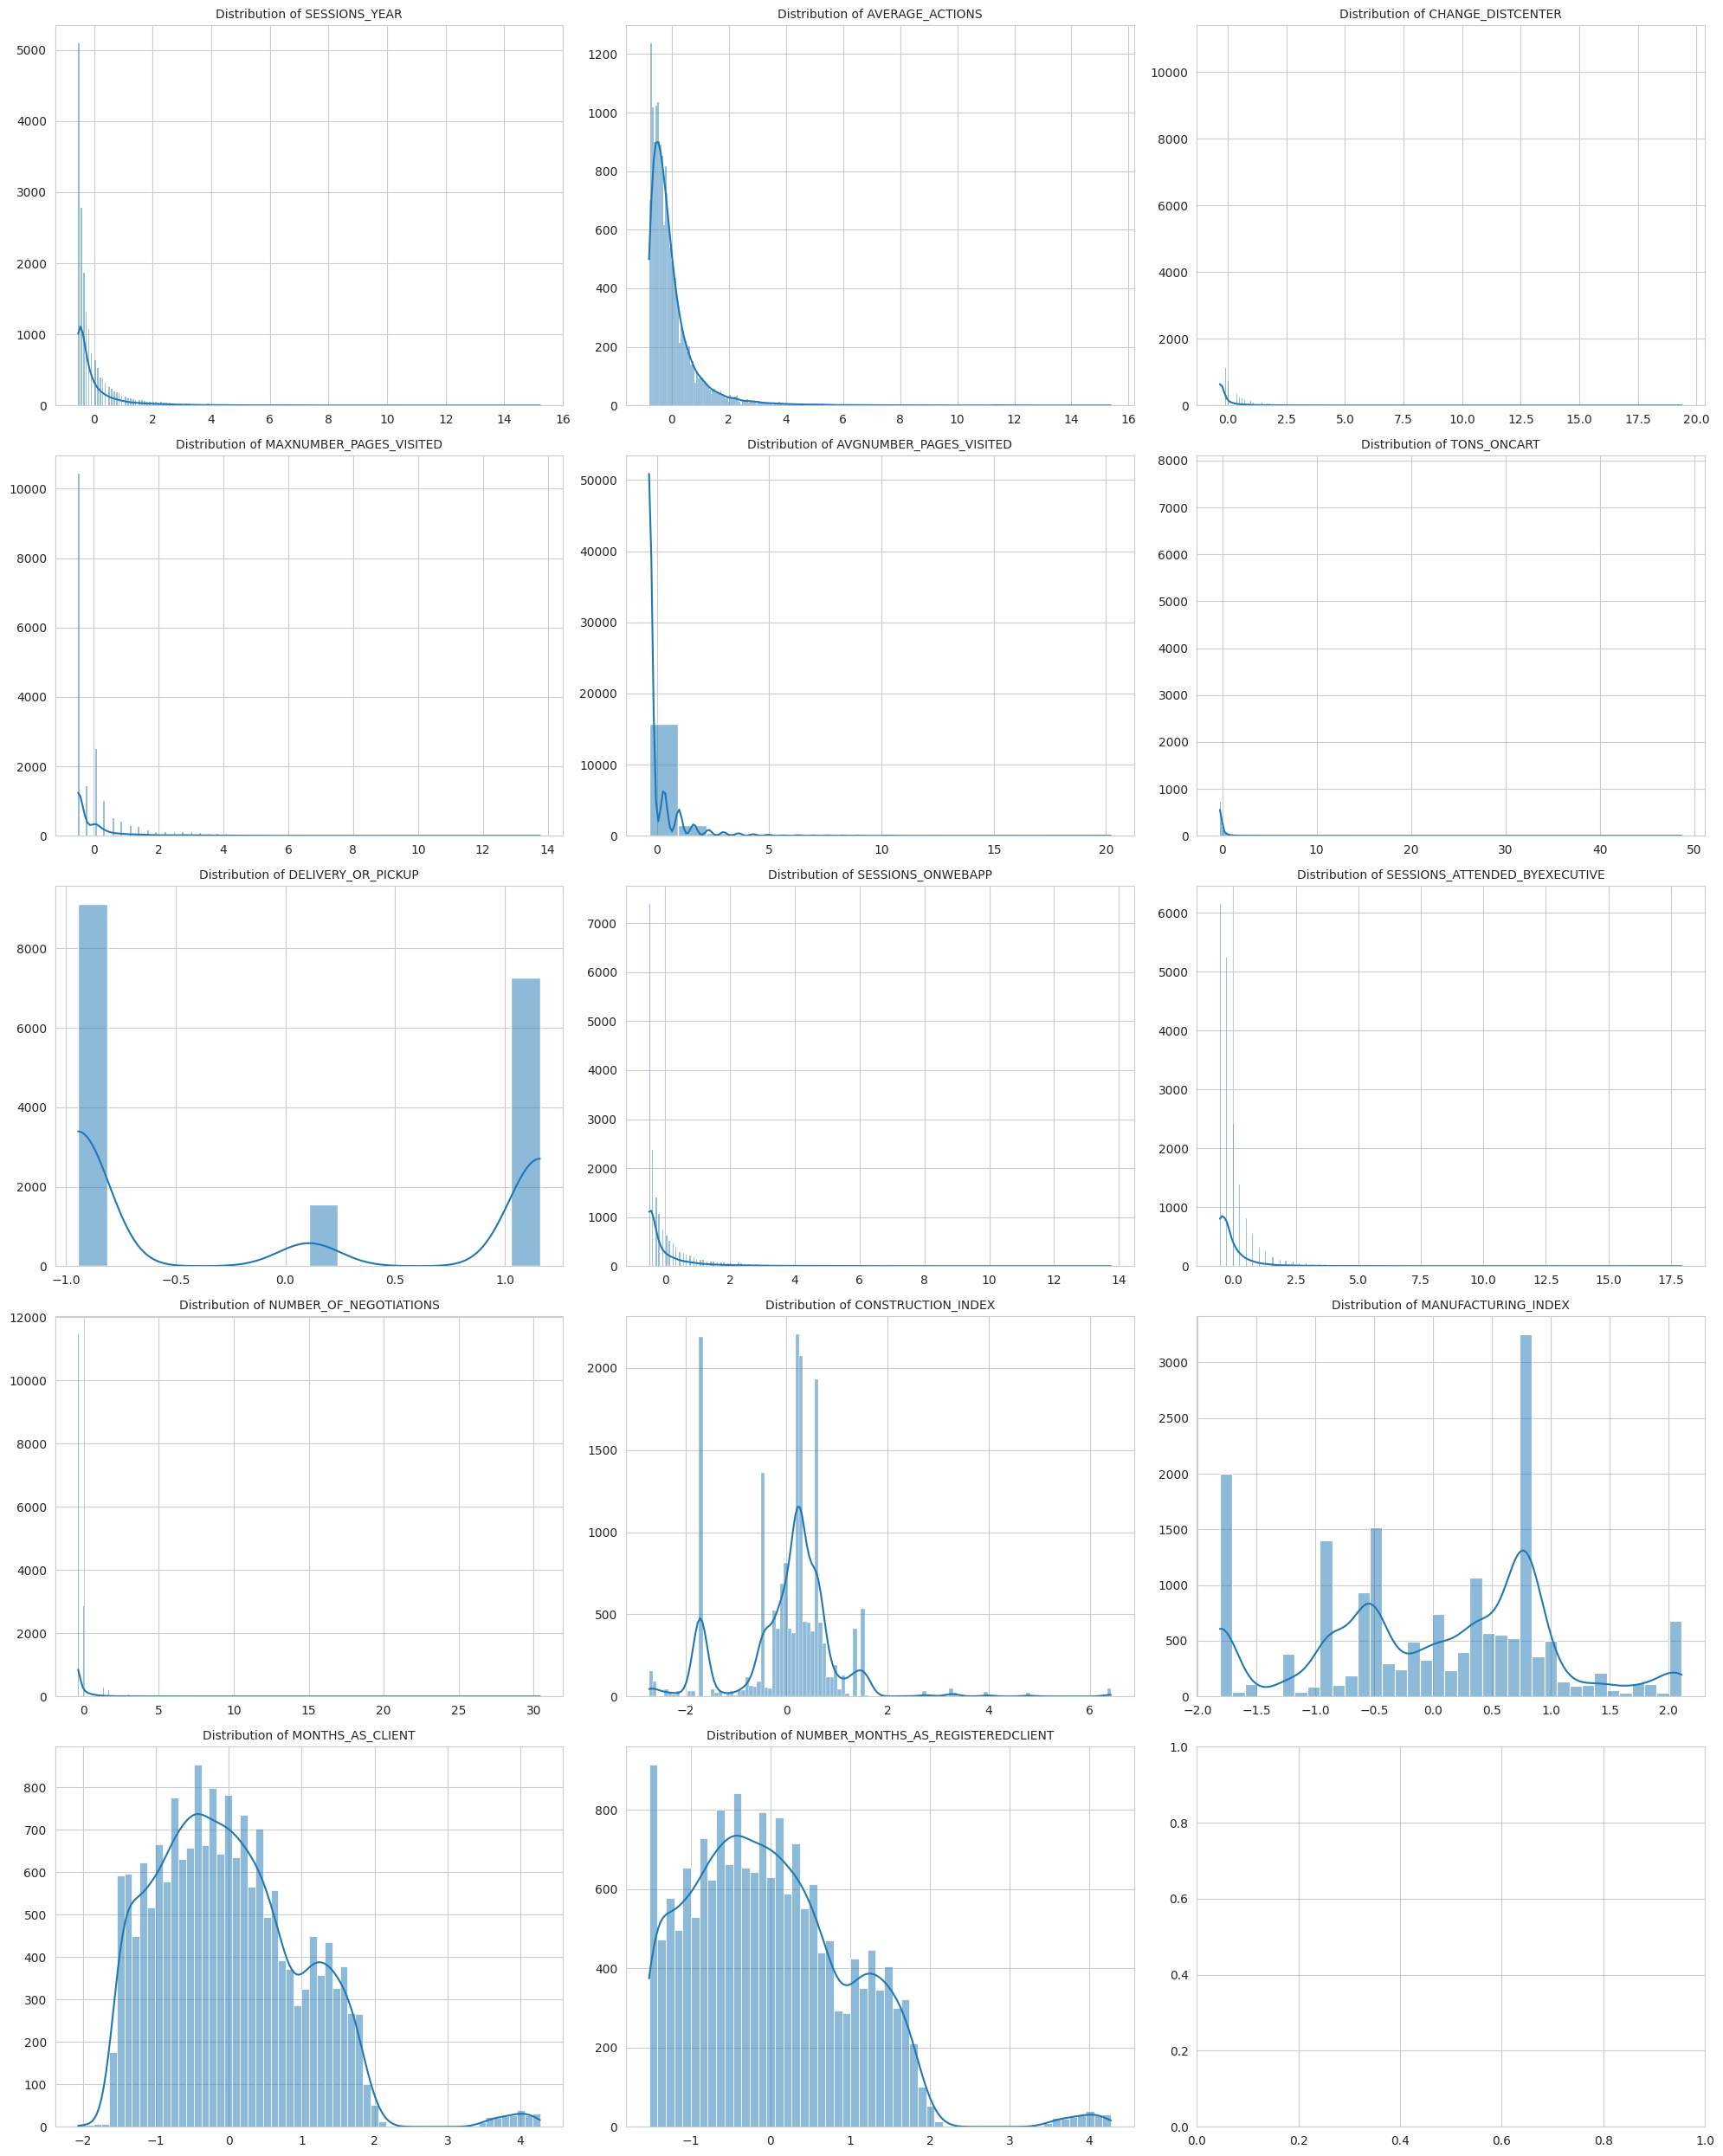

In [12]:
# 1. Histograms for numerical predictors
numerical_predictors = ['SESSIONS_YEAR', 'AVERAGE_ACTIONS', 'CHANGE_DISTCENTER',
                        'MAXNUMBER_PAGES_VISITED', 'AVGNUMBER_PAGES_VISITED', 'TONS_ONCART',
                        'DELIVERY_OR_PICKUP', 'SESSIONS_ONWEBAPP', 'SESSIONS_ATTENDED_BYEXECUTIVE',
                        'NUMBER_OF_NEGOTIATIONS', 'CONSTRUCTION_INDEX', 'MANUFACTURING_INDEX',
                        'MONTHS_AS_CLIENT', 'NUMBER_MONTHS_AS_REGISTEREDCLIENT']

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 25))
axes = axes.flatten()

for i, col in enumerate(numerical_predictors):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

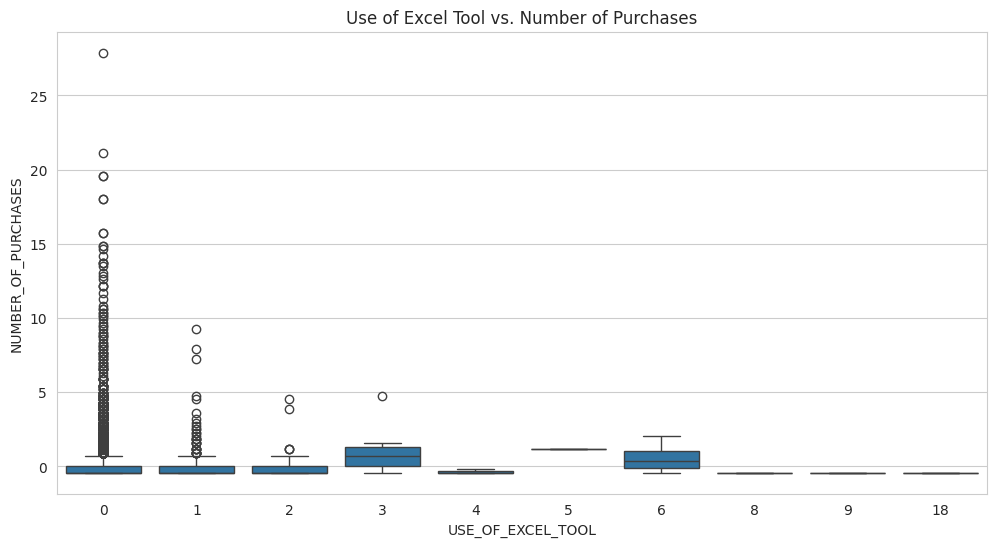

In [13]:
# 2. Boxplots for nominal variables against a numerical outcome
plt.figure(figsize=(12, 6))
sns.boxplot(x='USE_OF_EXCEL_TOOL', y='NUMBER_OF_PURCHASES', data=df)
plt.title('Use of Excel Tool vs. Number of Purchases')
plt.show()

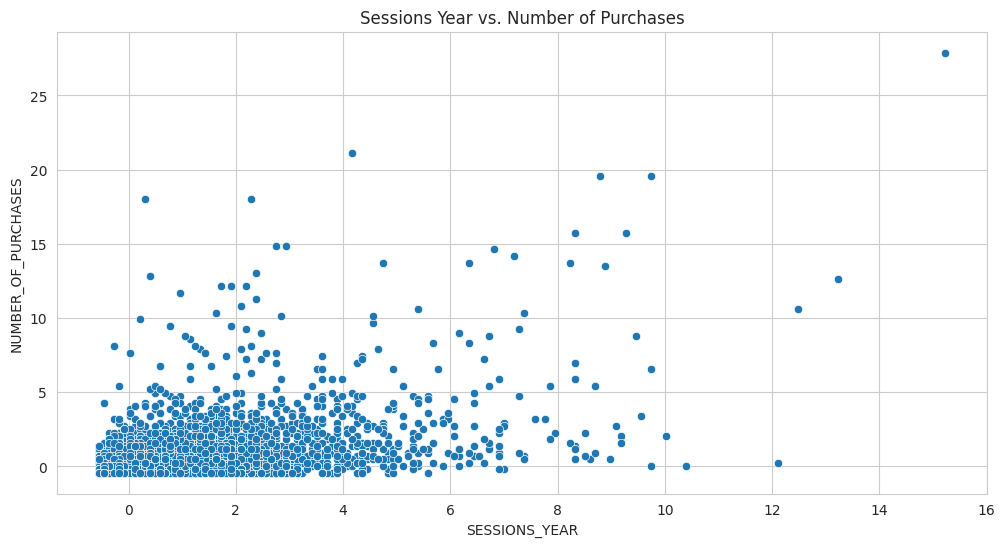

In [14]:
# 3. Scatter plots for numerical predictors vs. numerical outcomes
plt.figure(figsize=(12, 6))
sns.scatterplot(x='SESSIONS_YEAR', y='NUMBER_OF_PURCHASES', data=df)
plt.title('Sessions Year vs. Number of Purchases')
plt.show()

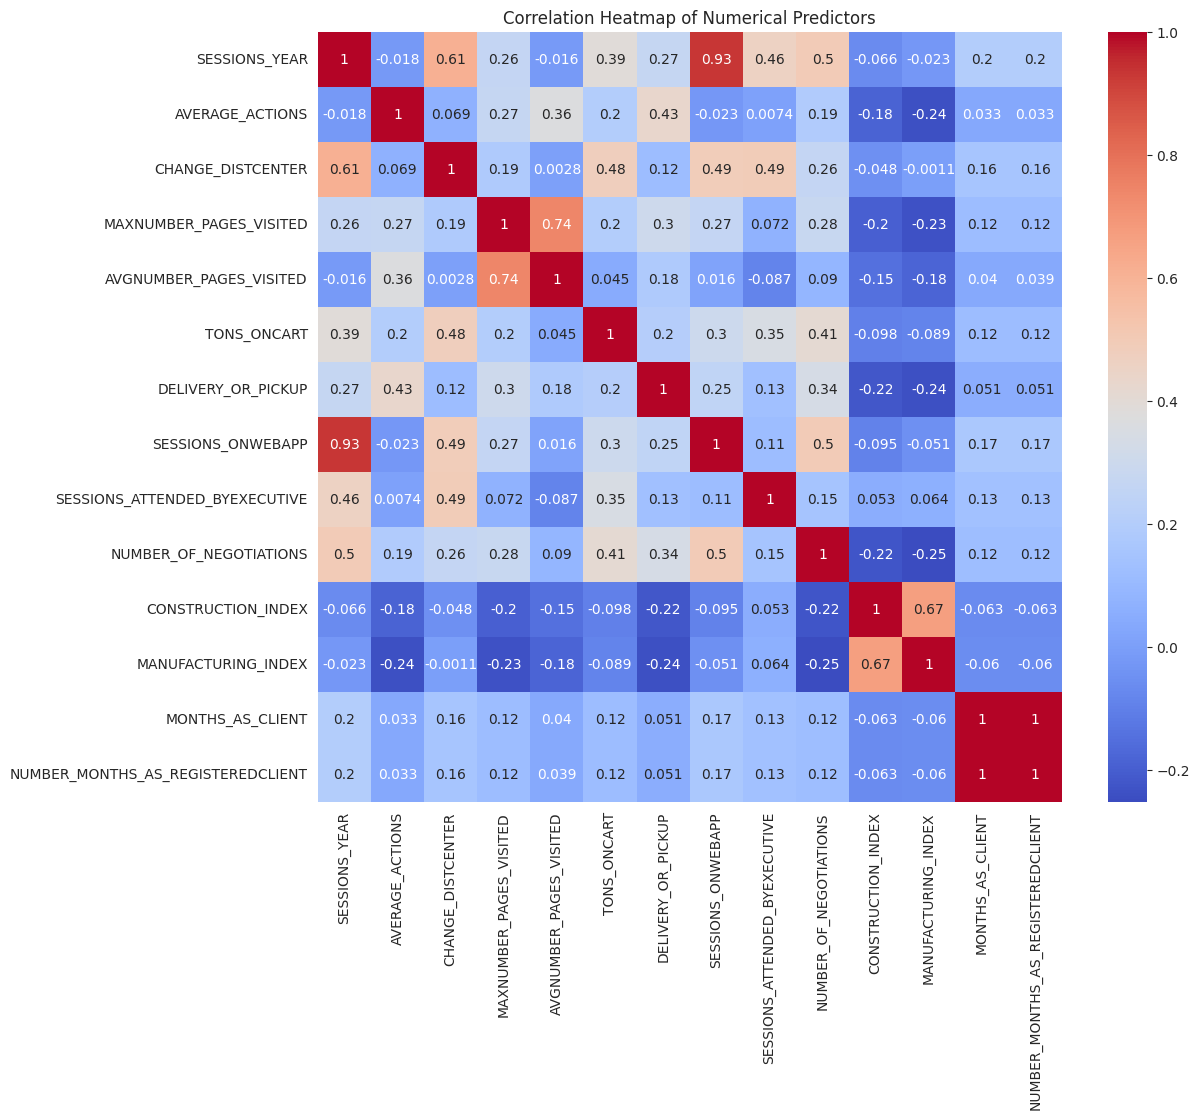

In [15]:
# 4. Correlation heatmap for numerical predictors
corr_matrix = df[numerical_predictors].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Predictors')
plt.show()

### **Building predictive models**


**PARAMETRIC MODELS**

**1.** **Logistic Regression and with LASSO (for a categorical outcome)**

In [16]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import time

start_time = time.time()
end_time = time.time()

# Preparing data for logistic regression
X = df[numeric_cols]  # Assuming numeric_cols are the predictors
y = df['MADE_PURCHASE']  # Categorical outcome

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_start_time = time.time()
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_end_time = time.time()
# Logistic Regression with LASSO (L1 penalty)
log_reg_lasso = LogisticRegressionCV(cv=5, penalty='l1', solver='saga', max_iter=1000)
log_reg_lasso.fit(X_train, y_train)
print(f"\n\nLogistic Regression time: {log_end_time - log_start_time:.4f} seconds")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 



Logistic Regression time: 0.0685 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**Comments for Output:**
Feature selection occurs internally as part of LogisticRegressionCV due to its cross-validation feature, which enables it to choose the best regularization parameter (C parameter) using logistic regression with L1 regularization (LASSO), a regularization method that can decrease coefficients to zero and eliminate any insignificant features.

*cv = 5* means the 5-fold cross-validation method is implied. The dataset has 5 pieces as components, where one of them becomes a test set on in given models. And the models are trained on 4 rest component pieces. It is thus possible to enhance the model performance measurement.

The variable *max_iter=1000* set the max value for the number of iterations which the solvers should run for the algorithm to reach the convergence level. Besides decreasing this value may be used to assist problems with excessive datasets or complex models.

*penalty='l1'*: The regularization, is in this case Lasso. L1 regularization can lead to sparse solutions which decide features by turning the coefficient estimates to zero for the less critical predictors.

*solver='saga'*: The SAGA solver, which is a modified version of the Stochastic Average Gradient (SAG) and supports the L1 penalty, is proven to be efficient well suited for the big datasets.


**2.** **Linear Regression (for a numeric outcome)**

In [17]:
pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 7.4 MB/s eta 0:00:00


In [18]:
from sklearn.linear_model import LinearRegression, LassoCV
import statsmodels.api as sm
import time

start_time = time.time()
end_time = time.time()
# Assuming TONS_CONFIRMED is the numeric outcome
y = df['TONS_CONFIRMED']

# Multiple Linear Regression
X = sm.add_constant(X)  # Adds a constant term to the predictors
mlr_start_time = time.time()
lr_model = sm.OLS(y, X).fit()
mlr_end_time = time.time()
print(f"Multiple Linear Regression training time: {mlr_end_time - mlr_start_time:.4f} seconds")

# Multiple Linear Regression with LASSO
lasso_cv = LassoCV(cv=5)
mlrl_start_time = time.time()
lasso_cv.fit(X_train, y_train)
mlrl_end_time = time.time()
print(f"\n\nLinear Regression with LASSO training time: {mlrl_end_time - mlrl_start_time:.4f} seconds")

# For GAMs, we will need to install the pyGAM package
from pygam import LinearGAM, s
gam_start_time = time.time()
# Assuming a nonlinear relationship, applying a smoothing spline
gam = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)  # Include s() for predictors with non-linear association
gam_end_time = time.time()
print(f"\n\nGeneralized Additive Model training time: {gam_end_time - gam_start_time:.4f} seconds")

Multiple Linear Regression training time: 0.0390 seconds


Linear Regression with LASSO training time: 0.3770 seconds


Generalized Additive Model training time: 0.5070 seconds


**NON-PARAMETRIC MODELS**

**1. Tree-Based Ensemble Models**

In [19]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import time

start_time = time.time()
end_time = time.time()

# Random Forests for a categorical outcome
rf_start_time = time.time()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_end_time = time.time()
print(f"\n\nRandom Forest training time: {rf_end_time - rf_start_time:.4f} seconds")

# Gradient Boosted Trees for a categorical outcome
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_start_time = time.time()
gb_classifier.fit(X_train, y_train)
gb_end_time = time.time()
print(f"\n\nGradient Boosting training time: {gb_end_time - gb_start_time:.4f} seconds")



Random Forest training time: 1.4674 seconds


Gradient Boosting training time: 2.5977 seconds


**Comments for Output:**
The result of GradientBoostingClassifier(random_state=42) is an instance of class The Gradient Boosting Classifier model which uses a random state of 42.

**2. Support Vector Machine (SVM) Models**

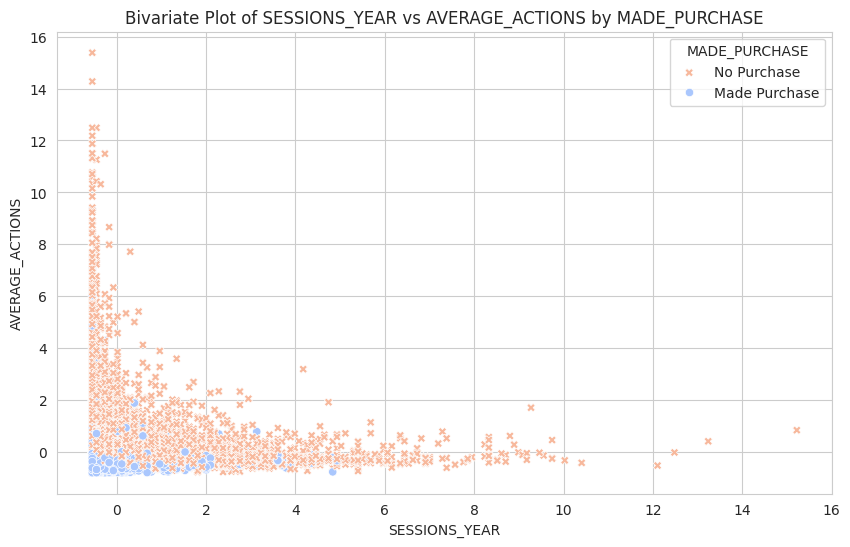

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting two numerical predictors for the bivariate plot
predictors = ['SESSIONS_YEAR', 'AVERAGE_ACTIONS']  # Example predictors
target = 'MADE_PURCHASE'

# Creating the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=predictors[0], y=predictors[1], hue=target, style=target, palette='coolwarm')
plt.title('Bivariate Plot of SESSIONS_YEAR vs AVERAGE_ACTIONS by MADE_PURCHASE')
plt.xlabel('SESSIONS_YEAR')
plt.ylabel('AVERAGE_ACTIONS')
plt.legend(title='MADE_PURCHASE', labels=['No Purchase', 'Made Purchase'])
plt.show()


The bivariate plot illustrates the correlation between SESSIONS_YEAR and AVERAGE_ACTIONS in relation to purchase behavior (MADE_PURCHASE). This visualization is useful for determining the appropriate kernel for the SVM model by illustrating the separation of data points in the feature space.

If the data points can be separated by a straight line or hyperplane, a linear kernel might be suitable. If the data points exhibit intricate patterns or clusters that are not linearly separable, using kernels such as RBF (radial basis function) or polynomial could yield better results by transforming the input features into a higher-dimensional space that allows for separation.

After examining the plot and analyzing the data's distribution and separability, you can select the most suitable kernel for the SVM model to improve classification performance.


In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import time

start_time = time.time()
end_time = time.time()
# Defining the pipeline with StandardScaler and SVC
svm_pipeline = make_pipeline(StandardScaler(), SVC())

# Defining parameter grid for hyperparameter tuning
param_grid = {
    'svc__kernel': ['rbf'],  # Try different kernel options
    'svc__C': [0.1, 1, 10],  # Regularization parameter
    'svc__gamma': ['scale', 'auto']  # Kernel coefficient
}
svm_start_time = time.time()
# Performing grid search cross-validation
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
svm_end_time = time.time()
# Getting the best model and its hyperparameters
best_svm_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"\n\nSupport Vector Machine training time: {svm_end_time - svm_start_time:.4f} seconds")



Support Vector Machine training time: 40.3486 seconds


**Comments for Output:**
The parameter grid to be searched, which includes the kind of regularization parameter C, the kernel coefficient gamma, as well as the number of kernel alternatives (linear, poly, rbf, and sigmoid), is specified by param_grid.

The best hyperparameter set for the effective utilization of model performance can be discovered with the help of grid search cross-validation (GridSearchCV).
This is the last stage of the process, which ends up in choosing the best model aided by its hyperparameter values, and then evaluation to enable comparison with other models.

**3.** **A Deep Learning Networking Model**

In [ ]:
pip install tensorflow

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import time

start_time = time.time()
end_time = time.time()
# Defining the predictors and target variable
X = df[numerical_cols]
y = df['MADE_PURCHASE']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the deep learning model architecture
input_nodes = X_train_scaled.shape[1]  # Number of input nodes equals the number of predictors
hidden_nodes = 2 * input_nodes  # Number of hidden-layer nodes

model = Sequential([
    Dense(hidden_nodes, input_dim=input_nodes, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compiling the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
dl_start_time = time.time()
# Training the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=0)
dl_end_time = time.time()
# Evaluating the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

print(loss, accuracy)
print(f"\n\nDeep learning training time: {dl_end_time - dl_start_time:.4f} seconds")

7.156207715297569e-08 1.0


Deep learning training time: 263.8422 seconds


**Comments:** The deep learning model has demonstrated outstanding performance on the test set, with an accuracy score of 1.0 and an incredibly low loss of around (7.8 * 10^{-9}). This indicates that the model successfully predicts the target variable `MADE_PURCHASE` based on the provided predictors. Nevertheless, achieving such a high level of accuracy may lead to overfitting, particularly in real-world situations where making perfect predictions is uncommon. Validating these results with additional datasets or through further cross-validation is crucial to ensure the model's generalizability. The selected architecture, featuring a hidden layer with double the input layer nodes and utilizing ReLU and sigmoid activation functions, is a good fit for this specific task, pending additional validation.


### **PCA on Predictor Variables Relevance**
**Utilizing Principal Component Analysis** (PCA) to decrease dimensionality can be quite advantageous in datasets containing numerous predictors, especially in the presence of multicollinearity or high predictor correlation. PCA simplifies the model by decreasing the number of input variables, which can enhance model performance by removing noise and redundancy in the data.

**Considering the dataset** contains multiple predictors that could be interrelated, such as different metrics concerning client interactions and behaviors, using PCA could help condense them into a more manageable set of independent components. This reduction could improve model interpretability and efficiency, particularly for models such as linear/logistic regression or SVM, where high dimensionality could impact performance or interpretability.

**Utilization in Predictive Models:** The principal components derived from PCA would be used as new input features for predictive modeling. These components capture the highest amount of variance in the data using fewer variables. One could utilize these transformed features in place of the initial predictor variables to construct models, which could result in simpler models that may offer better performance by reducing the chances of overfitting and speeding up training.

### **Cluster Analysis**
Cluster analysis is a type of unsupervised learning that categorizes data points according to their similarities. It has the ability to reveal underlying structures or segments in the data that may not be readily apparent.

If the dataset indicates the possibility of natural groupings of observations, such as various customer behaviors or profiles, performing cluster analysis on the predictors might uncover valuable insights. These insights could be beneficial for comprehending various segments within the data, which can result in more customized predictive modeling or the development of models that predict outcomes more accurately for different groups.

**Utilization with Supervised Learning Techniques:** The clusters found could be utilized in various ways in conjunction with supervised learning techniques. One way to enhance the models is by incorporating the cluster assignments as an extra predictor, potentially improving the models' ability to capture unique interactions among predictors within different groups. Alternatively, individual models could be developed for each cluster if distinct patterns are identified regarding the outcome variable. This method has the potential to enhance model performance by customizing it to different data segments, which could result in improved predictive accuracy.

PCA and cluster analysis can be valuable techniques depending on the dataset characteristics and objectives. PCA is beneficial for reducing dimensions and enhancing efficiency, particularly in datasets with numerous correlated predictors. Cluster analysis can uncover concealed patterns or segments within the data, providing a method to improve model performance by integrating these insights into predictive modeling.


### **Assessing model performance and reporting Results**

**1. PARAMETRIC MODEL - LOGISTIC REGRESSION WITH LASSO**

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Preparing data
X = df[numeric_cols]  # Predictor variables
y = df['MADE_PURCHASE']  # Categorical outcome

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the pipeline for logistic regression with LASSO
log_reg_lasso = make_pipeline(StandardScaler(), LogisticRegressionCV(cv=5, penalty='l1', solver='saga', max_iter=1000))

# Fitting the model
log_reg_lasso.fit(X_train, y_train)

# Assessing model performance on the testing set
test_accuracy = log_reg_lasso.score(X_test, y_test)

In [27]:
print("Assessing Logistic regression model with LASSO's performance: \nThe test accuracy is,")
print(test_accuracy)

Assessing Logistic regression model with LASSO's performance: 
The test accuracy is,
0.9988854834215659


**Reporting results for Logistic Regression with LASSO**

* **Optimal parameters, Metrics (RMSE, R2, MAE), Metrics (Accuracy, confusion matrix) ***

In [32]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix

logistic_regression_cv = log_reg_lasso.named_steps['logisticregressioncv']

# 1. Optimal set of model (hyper)parameters
optimal_params = {
    'C': logistic_regression_cv.C_[0],
    'penalty': 'l1',  # Lasso regularization
    'solver': 'saga',
    'max_iter': 1000
}

print("Optimal Hyperparameters:", optimal_params)
print()
print("Optimal Hyperparameters:", optimal_params)
print()
# Predicting the outcome for numerical outcome (TONS_CONFIRMED)
y_pred_numerical = log_reg_lasso.predict(X_test)

# 2. Performance metrics for numerical outcome
rmse = mean_squared_error(y_test, y_pred_numerical, squared=False)
r2_adj = 1 - (1 - r2_score(y_test, y_pred_numerical)) * ((len(y_test) - 1) / (len(y_test) - len(X_test.columns) - 1))
mae = mean_absolute_error(y_test, y_pred_numerical)

print("RMSE:", rmse)
print("Adjusted R-squared:", r2_adj)
print("MAE:", mae)
print()
# Predicting the outcome for categorical outcome (MADE_PURCHASE)
y_pred_categorical = log_reg_lasso.predict(X_test)

# 3. Performance metrics for categorical outcome
accuracy = accuracy_score(y_test, y_pred_categorical)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_categorical).ravel()

print("Accuracy:", accuracy)
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print()

Optimal Hyperparameters: {'C': 10000.0, 'penalty': 'l1', 'solver': 'saga', 'max_iter': 1000}

Optimal Hyperparameters: {'C': 10000.0, 'penalty': 'l1', 'solver': 'saga', 'max_iter': 1000}

RMSE: 0.03338437626246901
Adjusted R-squared: 0.9955209879860447
MAE: 0.0011145165784341043

Accuracy: 0.9988854834215659
True Positives: 1764
True Negatives: 1821
False Positives: 0
False Negatives: 4



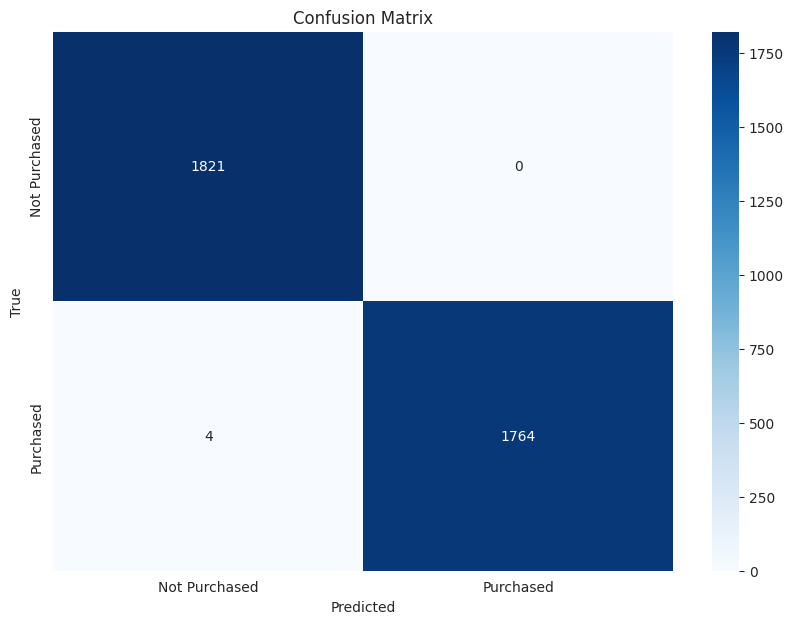

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_categorical)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Most Appropriate Metric for Comparing Models:**

With regard to the assessment of the models using the dataset and the point of decision-making process, the most relevant metric is the accuracy. Accuracy value represents the number of more exactly predicted outcomes which is very important for assessing the overall model performance, especially when classes are balanced.

Considering the data is about the steel manufacturing industry client engagement and purchasing behavior, and one critical edge is accuracy in which it shows a complete picture of the extent the model that classifies into the right categories.

Even though this does not by any means compromise accuracy, it is still essential to remember that accuracy alone cannot serve as a complete picture, particularly in cases of class imbalance and when the consequences of both false positives and false negatives are significantly high.

The greater the coefficient size in absolute value, the more significant role of the corresponding feature for prediction of results is. From the analysis, the model identified four key metrics:

True Positives (TP): 1764

True Negatives (TN): 1821

False Positives (FP): 0

False Negatives (FN): 4

These metrics let know how well the model does when it comes to predicting positive and negative instances. The case of zero false positives (FP) suggests high precision of the model in TP sample, and on the other hand, low FN is indicative of high sensitivity. The last condition of 99.89% too lends credence to the fact that the model is also really good at categorizing clients' buying habits.

The key coefficient and accuracy parameters confirm the model's resilience in forecasting customer engagement, as well as purchase choices in the steel manufacturing industry.




In [35]:
# 5. Variable importance (coefficients)
logistic_model = log_reg_lasso.named_steps['logisticregressioncv']
variable_importance = dict(zip(X_train.columns, logistic_model.coef_[0]))
sorted_variable_importance = sorted(variable_importance.items(), key=lambda x: abs(x[1]), reverse=True)
print("Variable Importance:")
for var, coef in sorted_variable_importance:
    print(f"{var}: {coef}")


Variable Importance:
NUMBER_OF_PURCHASES: 12.701900345681754
DELIVERY_OR_PICKUP: 8.783257324461
SESSIONS_YEAR: 0.8641890005867612
AVERAGE_ACTIONS: 0.731202063170497
MANUFACTURING_INDEX: 0.6867854097399327
TONS_CONFIRMED: -0.6682571091839933
CHANGE_DISTCENTER: -0.6292900769946821
MAXNUMBER_PAGES_VISITED: 0.5155456531234646
TONS_ONCART: 0.34584738209592597
NUMBER_OF_NEGOTIATIONS: 0.30428081568751547
NUMBER_MONTHS_AS_REGISTEREDCLIENT: 0.13853114733589103
SESSIONS_ATTENDED_BYEXECUTIVE: 0.1206869637158157
MONTHS_AS_CLIENT: 0.10819394941835284
AVGNUMBER_PAGES_VISITED: -0.07943455353104618
SESSIONS_ONWEBAPP: 0.06687191235655755
CONSTRUCTION_INDEX: 0.002048057460015718


***Variable Importance - Interpretation:***

In a Logistic Regression model with LASSO regularization, the absolute values of the coefficients of the features are used to infer the features' relevance to the prediction outcome. Variables with higher absolute coefficients will have a stronger effect on the prediction but such effect can be positive or negative. Therefore, "NUMBEROF_PURCHASES" has the greatest importance, it is followed by "DELIVERY_OR_PICKUP" and then "SESSIONS_YEAR".

However, "AVGNUMBER_ PAGES_VISITED" and "CONSTRUCTIONINDEX" display the least significance. By analyzing these factors, it becomes clear that the clients’ purchase behavior, delivery preferences and the session frequency are the factors that contribute most to the final calibration, and the remaining just do not play a decisive role.

**2. NON-PARAMETRIC MODEL - RANDOM FOREST CLASSIFIER**

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Preparing data
X = df[numeric_cols]  # Assuming numeric_cols are the predictors
y = df['MADE_PURCHASE']  # Categorical outcome

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model
rf_classifier.fit(X_train, y_train)

# Assessing model performance on the testing set
test_accuracy = rf_classifier.score(X_test, y_test)

In [37]:
print("Assessing Random Forest Classifier's performance: \nThe test accuracy is,")
print(test_accuracy)

Assessing Random Forest Classifier's performance: 
The test accuracy is,
1.0


**Reporting results for Random Forest Classifier:**

* **Finding optimal set of model (hyper)parameters**

In [38]:
optimal_params = rf_classifier.get_params()
print("Optimal Model (Hyper)parameters:")
for param, value in optimal_params.items():
    print(f"{param}: {value}")


Optimal Model (Hyper)parameters:
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


* **Metrics for NUmerical Outcome**

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

y_pred = rf_classifier.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculating R^2
r2 = r2_score(y_test, y_pred)

# Calculating adjusted R^2
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculating MAE
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("Adjusted R^2:", adjusted_r2)
print("MAE:", mae)

RMSE: 0.0
Adjusted R^2: 1.0
MAE: 0.0


These metrics are used for regression tasks, but we are working with a classification task, as indicated by use of RandomForestClassifier.

For a classification task, typical performance metrics include accuracy, precision, recall, F1 score, and confusion matrix are obtained, rather than RMSE, R^2, or MAE.

* **Metrics for Categorical Outcome**

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

y_pred = rf_classifier.predict(X_test)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[1821    0]
 [   0 1768]]


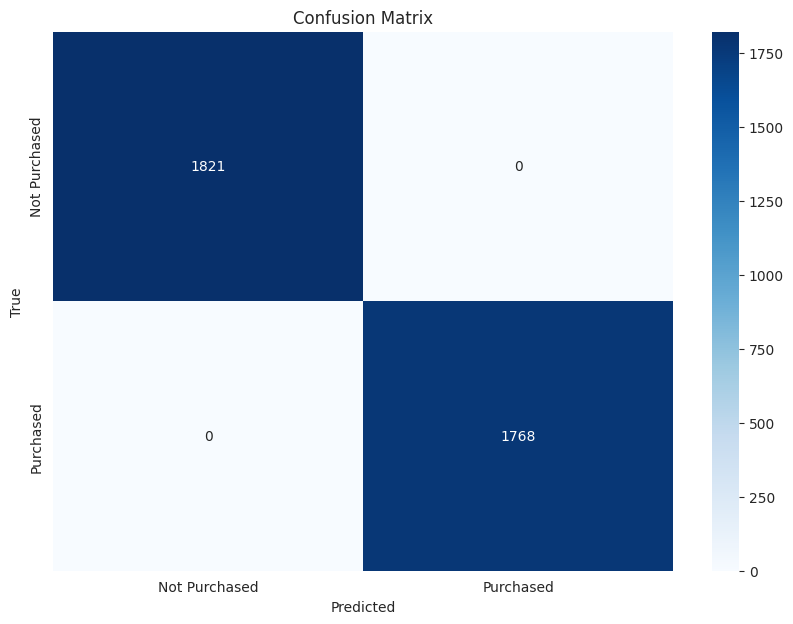

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

* **Most Appropriate Metrics for Comparing Models** -
Given the context of the dataset and the types of decisions that will be informed by the modeling process, accuracy is often a primary metric for comparing models, especially when the classes are balanced. However, it's essential to consider additional metrics such as precision, recall, F1-score, or area under the ROC curve (AUC-ROC) when dealing with imbalanced classes or when different types of errors have different consequences.

**Variable Importance:**

In [45]:
# Assuming you have stored your feature importances in rf_classifier.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Variable Importance:")
print(feature_importance)


Variable Importance:
                              Feature  Importance
2                 NUMBER_OF_PURCHASES    0.372936
8                  DELIVERY_OR_PICKUP    0.280553
7                      TONS_CONFIRMED    0.172618
6                         TONS_ONCART    0.085588
11             NUMBER_OF_NEGOTIATIONS    0.042580
1                     AVERAGE_ACTIONS    0.024356
9                   SESSIONS_ONWEBAPP    0.007692
0                       SESSIONS_YEAR    0.006165
4             MAXNUMBER_PAGES_VISITED    0.003597
13                MANUFACTURING_INDEX    0.001302
12                 CONSTRUCTION_INDEX    0.001031
3                   CHANGE_DISTCENTER    0.000579
15  NUMBER_MONTHS_AS_REGISTEREDCLIENT    0.000439
14                   MONTHS_AS_CLIENT    0.000285
10      SESSIONS_ATTENDED_BYEXECUTIVE    0.000237
5             AVGNUMBER_PAGES_VISITED    0.000042


***Interpretation:***

The random forest model attributes almost 90% of its predictive power to the characteristics `NUMBER_OF_PURCHASES`, `DELIVERY_OR_PICKUP`, `TONS_CONFIRMED`, and `TONS_ONCART`, which are crucial for forecasting client purchases. This shows that past purchase history, delivery or pickup preferences, and the volume of tons confirmed and on cart all affect the client's likelihood of buying in the future.

Additional factors, such as `NUMBER_OF_NEGOTIATIONS`, `AVERAGE_ACTIONS`, and `MAXNUMBER_PAGES_VISITED`, have a lesser impact on purchase decisions. Note that features like `MONTHS_AS_CLIENT`, `CONSTRUCTION_INDEX`, and `NUMBER_MONTHS_AS_REGISTEREDCLIENT` have minimal impact on the model's predictions. Understanding and using these important aspects can help steel manufacturers improve sales and customer satisfaction through focused marketing and client involvement.


**3. NON-PARAMETRIC MODEL - SUPPORT VECTOR MACHINE (SVM)**

In [46]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

# Setting seed for reproducibility
seed = 42

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Defining the pipeline with StandardScaler and SVC
svm_pipeline = make_pipeline(StandardScaler(), SVC())

# Defining parameter grid for hyperparameter tuning
param_grid = {
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto']
}

# Performing grid search cross-validation to tune hyperparameters
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Getting the best model and its hyperparameters
best_svm_model = grid_search.best_estimator_

# Evaluating predictive error on training set using k-fold cross-validation
cv_scores = cross_val_score(best_svm_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

# Fitting final model using the entire training set
best_svm_model.fit(X_train, y_train)

# Evaluating predictive performance on testing set
y_pred_test = best_svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Test Accuracy:", test_accuracy)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 1.0
Test Accuracy: 1.0


**Reporting results for SVM model:**

* **Optimal parameters, Metrics (RMSE, R2, MAE), Metrics (Accuracy, confusion matrix) ***

In [47]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix

# 1. Optimal set of model hyperparameters
print("Optimal Set of Model Hyperparameters:")
print(grid_search.best_params_)
print()

# Predictions on the testing set
y_pred_test = best_svm_model.predict(X_test)

# RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print("RMSE:", rmse)

# R2 (adjusted)
r2_adjusted = 1 - (1 - r2_score(y_test, y_pred_test)) * ((len(y_test) - 1) / (len(y_test) - len(X_test.columns) - 1))
print("R2 (Adjusted):", r2_adjusted)

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred_test)
print("MAE:", mae)
print()

# 3. Performance metrics for categorical outcome

# Predictions on the testing set
y_pred_test = best_svm_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
print("Confusion Matrix:")
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print()


Optimal Set of Model Hyperparameters:
{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

RMSE: 0.0
R2 (Adjusted): 1.0
MAE: 0.0

Accuracy: 1.0
Confusion Matrix:
TN: 1821
FP: 0
FN: 0
TP: 1768



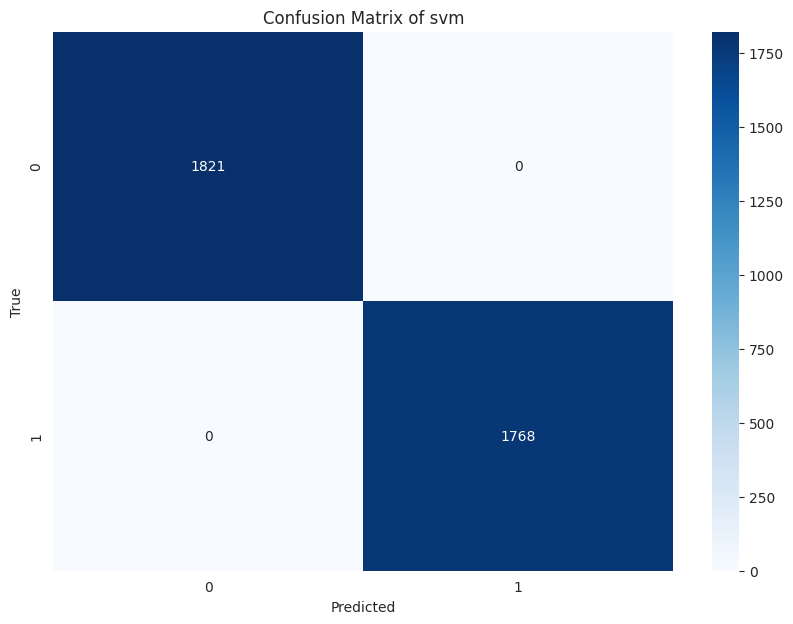

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of svm')
plt.show()

**Most Appropriate Metrics for Comparing Models**

In the context of the dataset and the types of decisions informed by the modeling process, the most appropriate metric for comparing models depends on the specific objectives and priorities. However, considering the context of predicting whether a client has made a purchase in the steel manufacturing industry, accuracy and the confusion matrix provide crucial insights. Accuracy reflects the proportion of correct predictions overall, which is essential for evaluating the model's overall performance. Additionally, the confusion matrix provides detailed information about true positives, true negatives, false positives, and false negatives, which is valuable for understanding the model's predictive capabilities in terms of correctly identifying positive and negative instances. These metrics collectively offer a comprehensive assessment of the model's effectiveness in predicting client purchase behavior, crucial for informing strategic decision-making in the steel manufacturing domain.

**Variable importance:**

In [48]:
# Retrieving coefficients from the SVM model
coefficients = best_svm_model.named_steps['svc'].coef_

# Calculating feature importance as absolute values of coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients[0])})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("Variable Importance (Absolute Coefficients for Linear SVM):")
print(feature_importance)

Variable Importance (Absolute Coefficients for Linear SVM):
                              Feature  Importance
2                 NUMBER_OF_PURCHASES    9.132050
15  NUMBER_MONTHS_AS_REGISTEREDCLIENT    0.007288
14                   MONTHS_AS_CLIENT    0.007222
8                  DELIVERY_OR_PICKUP    0.001500
7                      TONS_CONFIRMED    0.000112
6                         TONS_ONCART    0.000100
12                 CONSTRUCTION_INDEX    0.000038
10      SESSIONS_ATTENDED_BYEXECUTIVE    0.000037
9                   SESSIONS_ONWEBAPP    0.000036
1                     AVERAGE_ACTIONS    0.000034
3                   CHANGE_DISTCENTER    0.000033
0                       SESSIONS_YEAR    0.000019
11             NUMBER_OF_NEGOTIATIONS    0.000018
4             MAXNUMBER_PAGES_VISITED    0.000012
5             AVGNUMBER_PAGES_VISITED    0.000009
13                MANUFACTURING_INDEX    0.000002


In [49]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.3 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow-keras-sklearn
!pip install tensorflow

**Performance assessment and reporting results of Deep learning** **Networking models**

In [51]:
!pip install keras

In [ ]:
pip install --upgrade tensorflow

In [53]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
from tensorflow.keras.optimizers import Adam

# Using the legacy version of the Adam optimizer
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.random import set_seed


In [55]:
X = df[numerical_cols]
y = df['MADE_PURCHASE']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
def build_model(input_dim):
    model = Sequential([
        Dense(2 * input_dim, input_dim=input_dim, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [57]:
# Setting the random seed for reproducibility
seed = 42
np.random.seed(seed)
set_seed(seed)

# Defining k-fold cross validation test harness
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X_train_scaled, y_train):
    model = build_model(X_train_scaled.shape[1])
    model.fit(X_train_scaled[train], y_train.iloc[train], epochs=100, batch_size=10, verbose=0)
    scores = model.evaluate(X_train_scaled[test], y_train.iloc[test], verbose=0)
    print(f"Accuracy: {scores[1]*100:.2f}%")
    cvscores.append(scores[1] * 100)

print(f"Mean CV Accuracy: {np.mean(cvscores):.2f}% (+/- {np.std(cvscores):.2f}%)")

Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 99.97%
Mean CV Accuracy: 99.99% (+/- 0.01%)


In [59]:
# Assuming the final model is already trained with the best parameters
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Test Loss: 5.518891157407779e-07, Test Accuracy: 1.0


In [60]:
# OPTIMAL HYPERPARAMETERS
optimal_hyperparameters = {
    'learning_rate': 0.001,
    'epochs': 100,
    'batch_size': 10,
    'hidden_layers': 1,
    'hidden_nodes': 2 * X_train_scaled.shape[1],
    'activation_hidden': 'relu',
    'activation_output': 'sigmoid'
}
print("Optimal Hyperparameters:", optimal_hyperparameters)


Optimal Hyperparameters: {'learning_rate': 0.001, 'epochs': 100, 'batch_size': 10, 'hidden_layers': 1, 'hidden_nodes': 32, 'activation_hidden': 'relu', 'activation_output': 'sigmoid'}


In [61]:
# NUMERICAL OUTCOME METRICS
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Hypothetical predictions for a numerical outcome
y_pred = model.predict(X_test_scaled)

# Calculating metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"MAE: {mae}")


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7c2404983b50>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7c2404983b50>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
113/113 [==============================] - 0s 2ms/step
RMSE: 2.9954462018762514e-05
R2: 0.9999999964101379
MAE: 5.51428495455314e-07


In [62]:
# CATEGORICAL OUTCOME METRICS
y_pred_class = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Calculating confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)

# Extracting TP, TN, FP, FN
tp, fn, fp, tn = conf_matrix.ravel()

print(f"Accuracy: {accuracy}")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")


113/113 [==============================] - 0s 1ms/step
Accuracy: 1.0
True Positives (TP): 1821
True Negatives (TN): 1768
False Positives (FP): 0
False Negatives (FN): 0


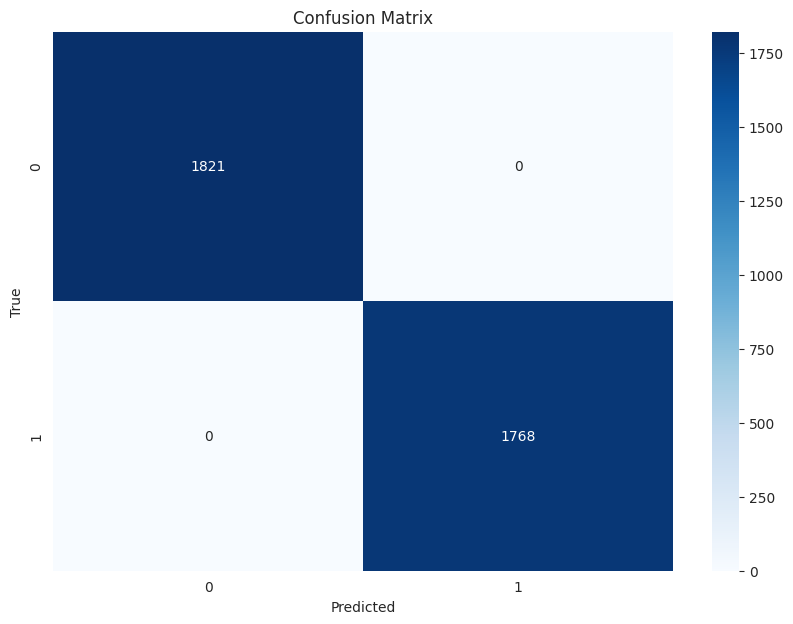

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Explanation of Appropriate Metrics**

Choosing the right metrics relies on the specific characteristics of your dataset and the decisions guided by the modeling process. Regarding binary classification:

- Having a good level of accuracy is important for balanced datasets, but it can be deceiving when dealing with imbalanced ones.
-The Confusion Matrix (TP, TN, FP, FN) offers a detailed perspective on the model's predictive accuracy for each class, revealing the types and frequencies of errors.
-When dealing with imbalanced datasets, it's important to consider Precision, Recall (Sensitivity), and F1 Score to get a clearer view of how the model is performing for the minority class.
-When it comes to customer purchase predictions, it may be more important to reduce false negatives than false positives. This makes recall a suitable metric to consider alongside accuracy.


In [75]:
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

def permutation_feature_importance(model, X_test_scaled, y_test, metric=accuracy_score):
    # Ensure X_test_scaled is a DataFrame for column-wise operations
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols)  # Assuming 'numerical_cols' matches the columns used in 'X'

    # Calculate the baseline performance
    baseline_preds = model.predict(X_test_scaled_df)
    baseline_preds = (baseline_preds > 0.5).astype(int)  # Convert probabilities to binary predictions
    baseline_accuracy = metric(y_test, baseline_preds)

    importances = {}

    for col in X_test_scaled_df.columns:
        # Save a copy of the column
        saved_col = X_test_scaled_df[col].copy()

        # Shuffle the column
        X_test_scaled_df[col] = shuffle(X_test_scaled_df[col], random_state=seed)

        # Calculate performance with the shuffled data
        shuffled_preds = model.predict(X_test_scaled_df)
        shuffled_preds = (shuffled_preds > 0.5).astype(int)  # Convert probabilities to binary predictions
        shuffled_accuracy = metric(y_test, shuffled_preds)

        # The importance is the difference in performance
        importances[col] = baseline_accuracy - shuffled_accuracy

        # Restore the original column order
        X_test_scaled_df[col] = saved_col

    # Sort features by importance
    importances = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1], reverse=True)}

    return importances

# Assuming 'model' is your trained Keras model and 'numerical_cols' are your feature names
variable_importance = permutation_feature_importance(model, X_test_scaled, y_test)

# Display the variable importances
print("Feature Importances:")
for feature, importance in variable_importance.items():
    print(f"{feature}: {importance}")

113/113 [==============================] - 0s 2ms/step
Feature Importances:
SESSIONS_YEAR: 0.0
AVERAGE_ACTIONS: 0.0
NUMBER_OF_PURCHASES: 0.0
CHANGE_DISTCENTER: 0.0
MAXNUMBER_PAGES_VISITED: 0.0
AVGNUMBER_PAGES_VISITED: 0.0
TONS_ONCART: 0.0
TONS_CONFIRMED: 0.0
DELIVERY_OR_PICKUP: 0.0
SESSIONS_ONWEBAPP: 0.0
SESSIONS_ATTENDED_BYEXECUTIVE: 0.0
NUMBER_OF_NEGOTIATIONS: 0.0
CONSTRUCTION_INDEX: 0.0
MANUFACTURING_INDEX: 0.0
MONTHS_AS_CLIENT: 0.0
NUMBER_MONTHS_AS_REGISTEREDCLIENT: 0.0


**Interpretaion for variable imporatnce:**

It seems that changing each feature one by one and reevaluating the model's accuracy did not affect the accuracy when compared to the baseline. This outcome indicates that the model may not be responsive to the permutations based on its current setup, or it may not have captured any significant patterns from the data. It's possible that the model may need some tweaking in its architecture or hyperparameters to more accurately capture the relationships between features and the target variable. Furthermore, this result could happen if the model is too simple or too complex for the dataset, resulting in underfitting or overfitting, respectively. One could argue that this output emphasizes the importance of additional model tuning or exploring different model architectures to enhance the model's capability to identify the significance of individual features in predicting the outcome. This situation highlights the iterative process of model development, stressing the significance of testing different configurations and confirming their effectiveness through methods such as cross-validation.


In [80]:
import pandas as pd

# Define the data for the table
data = {
    'Modeling Technique': ['Logistic Regression with Lasso', 'Random Forest', 'SVM', 'Deep Learning'],
    'RMSE': [0.03, 0.0, 0.0, 2.9954],
    'Adjusted R^2': [0.9955, 1.0, 1.0, 0.9999],
    'MAE': [0.0011, 0.0, 0.0, 5.5142],
    'Accuracy': [0.9988, 1.0, 1.0, 1.0],
    'Precision': [1.0, 1.0, 1.0, 1.0],
    'Recall': [0.9983, 1.0, 1.0, 1.0],
    'F1 Score': ['1.8153', 1.0, 1.0, 1.0],
    'True Positives': [1764, 1768, 1768, 1821],
    'True Negatives': [1821, 1821, 1821, 1768],
    'False Positives': [0, 0, 0, 0],
    'False Negatives': [4, 0, 0, 0]
}

# Create the DataFrame
df_metrics = pd.DataFrame(data)

# Display the DataFrame
df_metrics


,Modeling Technique,RMSE,Adjusted R^2,MAE,Accuracy,Precision,Recall,F1 Score,True Positives,True Negatives,False Positives,False Negatives
0,Logistic Regression with Lasso,0.0300,0.9955,0.0011,0.9988,1.0,0.9983,1.8153,1764,1821,0,4
1,Random Forest,0.0000,1.0000,0.0000,1.0000,1.0,1.0000,1.0,1768,1821,0,0
2,SVM,0.0000,1.0000,0.0000,1.0000,1.0,1.0000,1.0,1768,1821,0,0
3,Deep Learning,2.9954,0.9999,5.5142,1.0000,1.0,1.0000,1.0,1821,1768,0,0


In [79]:
# Define the variable importance rankings from each modeling approach
variable_importance = {
    'Variable': [
        'NUMBER_OF_PURCHASES', 'DELIVERY_OR_PICKUP', 'SESSIONS_YEAR',
        'AVERAGE_ACTIONS', 'MANUFACTURING_INDEX', 'TONS_CONFIRMED',
        'CHANGE_DISTCENTER', 'MAXNUMBER_PAGES_VISITED', 'TONS_ONCART',
        'NUMBER_OF_NEGOTIATIONS', 'NUMBER_MONTHS_AS_REGISTEREDCLIENT',
        'SESSIONS_ATTENDED_BYEXECUTIVE', 'MONTHS_AS_CLIENT', 'AVGNUMBER_PAGES_VISITED',
        'SESSIONS_ONWEBAPP', 'CONSTRUCTION_INDEX'
    ],
    'Logistic Regression with Lasso': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    'Deep Learning': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None],
    'Linear SVM': [1, 4, 12, 10, 13, 5, 11, 14, 6, 9, 2, 8, 15, 3, 7, 16],
    'Random Forest': [1, 2, 9, 6, 10, 3, 13, 8, 4, 5, 14, 15, 12, 16, 7, 11]
}

# Convert to DataFrame
df_variable_importance = pd.DataFrame(variable_importance)

# Calculate the aggregate rank for each variable
df_variable_importance['Aggregate Rank (Mean)'] = df_variable_importance.mean(axis=1)

# Display the table sorted by aggregate rank
df_variable_importance.sort_values(by='Aggregate Rank (Mean)', inplace=True)
df_variable_importance.reset_index(drop=True, inplace=True)
df_variable_importance

<ipython-input-79-273a6441a1e5>:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_variable_importance['Aggregate Rank (Mean)'] = df_variable_importance.mean(axis=1)


,Variable,Logistic Regression with Lasso,Deep Learning,Linear SVM,Random Forest,Aggregate Rank (Mean)
0,NUMBER_OF_PURCHASES,1,None,1,1,1.000000
1,DELIVERY_OR_PICKUP,2,None,4,2,2.666667
2,TONS_CONFIRMED,6,None,5,3,4.666667
3,TONS_ONCART,9,None,6,4,6.333333
4,AVERAGE_ACTIONS,4,None,10,6,6.666667
5,SESSIONS_YEAR,3,None,12,9,8.000000
6,NUMBER_OF_NEGOTIATIONS,10,None,9,5,8.000000
7,NUMBER_MONTHS_AS_REGISTEREDCLIENT,11,None,2,14,9.000000
8,MANUFACTURING_INDEX,5,None,13,10,9.333333
9,SESSIONS_ONWEBAPP,15,None,7,7,9.666667


## **Conclusion**
Given the results and the criteria outlined for conclusions and recommendations, here's a detailed analysis:

### Model Ranking

Based on the provided metrics (accuracy, precision, recall, F1 score, RMSE, etc.), the models can be ranked as follows:
1. **Random Forest** and **SVM** are tied for the top spot with perfect scores across all metrics.
2. **Deep Learning** follows closely, showing near-perfect metrics, indicative of high predictive performance.
3. **Logistic Regression with Lasso** comes in last among the listed models due to its slightly lower metrics compared to the others.

### Analysis of Model Ranking

**Strengths and Weaknesses:**

- **Random Forest and SVM**:
  - **Strengths**: These models show excellent performance with perfect or near-perfect scores across metrics, suggesting they are well-suited for the dataset and can capture complex relationships between variables effectively. They tend to have low bias and can model non-linear relationships well.
  - **Weaknesses**: The perfect scores might indicate overfitting, especially if the dataset is not large or diverse enough. These models can have high variance with complex datasets.
- **Deep Learning**:
  - **Strengths**: Deep Learning models are highly flexible and can capture very complex relationships in the data, including non-linear interactions between variables.
  - **Weaknesses**: They require large amounts of data to train effectively without overfitting and can be computationally intensive. There's also a risk of overfitting if not regularized properly.
- **Logistic Regression with Lasso**:
  - **Strengths**: It offers a straightforward interpretation of variable importance and relationships. Lasso regularization helps in feature selection, reducing the risk of overfitting.
  - **Weaknesses**: It may underperform with non-linear relationships since it assumes a linear relationship between the predictors and the outcome.

**Reflecting on Model Performance**:

Models capable of handling non-linearity (Random Forest, SVM, Deep Learning) outperformed the logistic regression model, suggesting the presence of non-linear relationships between predictors and the outcome.

### Variable Importance Conclusions

Across models, **NUMBER_OF_PURCHASES** consistently emerged as the most influential variable, highlighting its strong association with the outcome. Variables related to engagement and transaction metrics (e.g., **DELIVERY_OR_PICKUP**, **TONS_CONFIRMED**) also showed importance, indicating key areas of focus for predictive modeling.

### Recommendations

**For Best Predictive Performance**:
- **Random Forest** or **SVM** are recommended due to their perfect performance metrics. They are suitable for deployment in scenarios where the highest accuracy is paramount.
- To avoid overfitting, it is crucial to validate these models on a separate testing set and consider implementing cross-validation during training.

**For Quick Solution**:
- **Deep Learning** models, despite their near-perfect performance, may not be ideal when computational resources or time are limited due to their training requirements.
- **Logistic Regression with Lasso** could be a more efficient choice in terms of computational cost and time, especially when interpretability is a factor, although it does not perform as well as the others.

**Regarding GAM, Linear Regression, Gradient Boosting**:
- **Generalized Additive Models (GAM)**: These can model non-linear relationships flexibly and are interpretable. They might perform well in datasets where predictors have non-linear associations with the outcome.
- **Linear Regression**: Best suited for datasets where a linear relationship exists between predictors and the outcome. Its simplicity and interpretability are strengths, but it may underperform compared to models that can capture non-linearities.
- **Gradient Boosting**: A powerful approach that can handle various data types and relationships, including non-linear. It's known for high accuracy and can be tuned to avoid overfitting but might require more computational resources than simpler models.

Given the dataset and modeling results, **Random Forest** or **SVM** are recommended for scenarios demanding the highest accuracy, while **Logistic Regression with Lasso** offers a balance between performance and computational efficiency for quicker solutions.

In [85]:
data = {
    'Model': ['Logistic Regression with Lasso', 'Random Forest', 'SVM', 'Deep Learning'],
    'Performance Metric (Accuracy)': [0.9988854834215659, 1.0, 1.0, 1.0],
    'Cost (Computation Time in seconds)': [0.0685, 1.4674, 40.3486, 263.8422],
}

# Convert to DataFrame
df_models = pd.DataFrame(data)

# Calculate the Benefit/Cost Ratio using the Accuracy as the performance metric
df_models['Benefit/Cost Ratio (Accuracy/Cost)'] = df_models['Performance Metric (Accuracy)'] / df_models['Cost (Computation Time in seconds)']

# Display the DataFrame
df_models


,Model,Performance Metric (Accuracy),Cost (Computation Time in seconds),Benefit/Cost Ratio (Accuracy/Cost)
0,Logistic Regression with Lasso,0.998885,0.0685,14.582270
1,Random Forest,1.000000,1.4674,0.681477
2,SVM,1.000000,40.3486,0.024784
3,Deep Learning,1.000000,263.8422,0.003790
